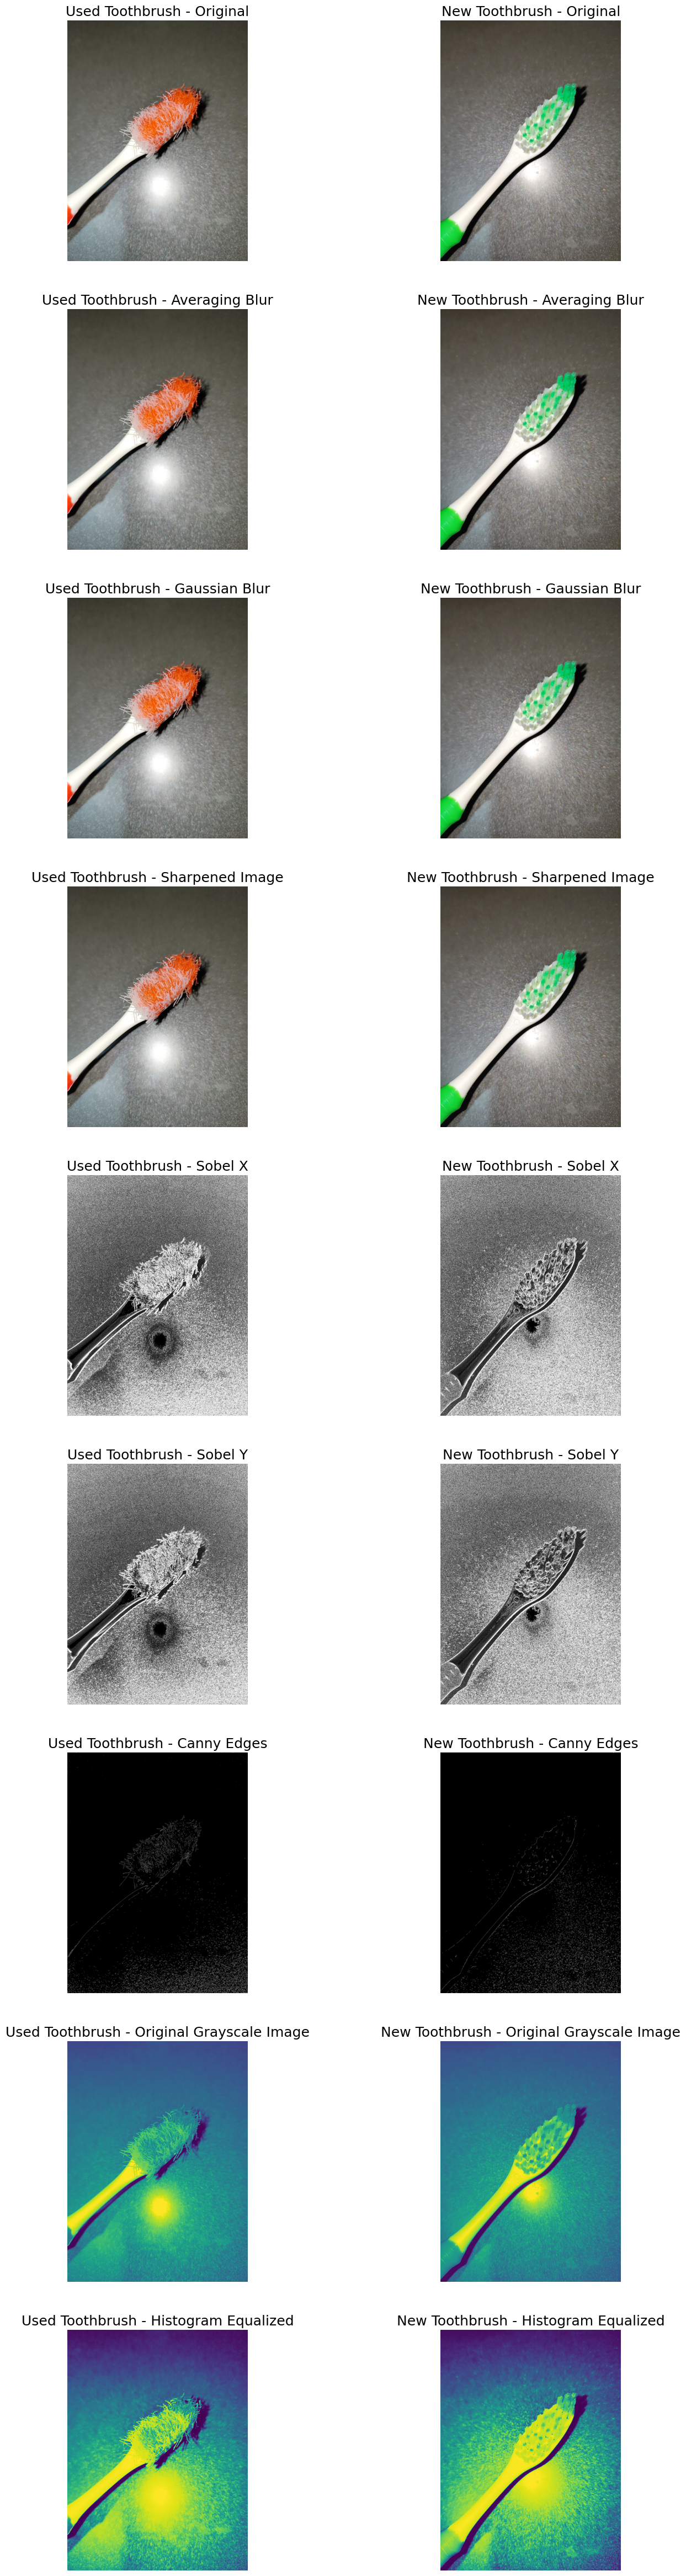

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
used_image = cv2.imread(r'E:\School works\College\4th Yr\PROF ELEC 5\Assignment Image Processing\Used_Toothbrush.jpg')
new_image = cv2.imread(r'E:\School works\College\4th Yr\PROF ELEC 5\Assignment Image Processing\New_Toothbrush.jpg')

# Convert to RGB for matplotlib (since OpenCV loads images in BGR)
used_image_rgb = cv2.cvtColor(used_image, cv2.COLOR_BGR2RGB)
new_image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# ======= 1. Image Smoothing (Blurring) =======
# Apply Averaging filter (Smoothing)
blur_avg_used = cv2.blur(used_image_rgb, (5, 5))
blur_avg_new = cv2.blur(new_image_rgb, (5, 5))

# Apply Gaussian filter (Smoothing)
blur_gaussian_used = cv2.GaussianBlur(used_image_rgb, (5, 5), 0)
blur_gaussian_new = cv2.GaussianBlur(new_image_rgb, (5, 5), 0)


# ======= 2. Image Sharpening =======
# Sharpening kernel
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened_used = cv2.filter2D(used_image_rgb, -1, kernel_sharpening)
sharpened_new = cv2.filter2D(new_image_rgb, -1, kernel_sharpening)


# ======= 3. Edge Detection (Sobel and Canny) =======
# Convert to grayscale for edge detection
gray_used = cv2.cvtColor(used_image_rgb, cv2.COLOR_RGB2GRAY)
gray_new = cv2.cvtColor(new_image_rgb, cv2.COLOR_RGB2GRAY)

# Sobel edge detection
sobel_x_used = cv2.Sobel(gray_used, cv2.CV_64F, 1, 0, ksize=5)
sobel_y_used = cv2.Sobel(gray_used, cv2.CV_64F, 0, 1, ksize=5)
sobel_x_used = cv2.convertScaleAbs(sobel_x_used)
sobel_y_used = cv2.convertScaleAbs(sobel_y_used)

sobel_x_new = cv2.Sobel(gray_new, cv2.CV_64F, 1, 0, ksize=5)
sobel_y_new = cv2.Sobel(gray_new, cv2.CV_64F, 0, 1, ksize=5)
sobel_x_new = cv2.convertScaleAbs(sobel_x_new)
sobel_y_new = cv2.convertScaleAbs(sobel_y_new)

# Canny edge detection
edges_used = cv2.Canny(gray_used, 100, 200)
edges_new = cv2.Canny(gray_new, 100, 200)


# ======= 4. Histogram Equalization =======
# Convert to grayscale
gray_image_used = cv2.cvtColor(used_image, cv2.COLOR_BGR2GRAY)
gray_image_new = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image_used = cv2.equalizeHist(gray_image_used)
equalized_image_new = cv2.equalizeHist(gray_image_new)


# ======= !!!DISPLAY RESULTS USING MATPLOTLIB!!! =======
fig, ax = plt.subplots(9, 2, figsize=(16, 60))


# ===DISPLAY==== Used Toothbrush ===DISPLAY====
# Plot original image
ax[0, 0].imshow(used_image_rgb)
ax[0, 0].set_title('Used Toothbrush - Original', fontsize=18)
ax[0, 0].axis('off')

# Plot Averaging Blur
ax[1, 0].imshow(blur_avg_used)
ax[1, 0].set_title('Used Toothbrush - Averaging Blur', fontsize=18)
ax[1, 0].axis('off')

# Plot Gaussian Blur
ax[2, 0].imshow(blur_gaussian_used)
ax[2, 0].set_title('Used Toothbrush - Gaussian Blur', fontsize=18)
ax[2, 0].axis('off')

# Plot Sharpened Image
ax[3, 0].imshow(sharpened_used)
ax[3, 0].set_title('Used Toothbrush - Sharpened Image', fontsize=18)
ax[3, 0].axis('off')

# Plot Sobel X (Vertical edges)
ax[4, 0].imshow(sobel_x_used, cmap='gray')
ax[4, 0].set_title('Used Toothbrush - Sobel X', fontsize=18)
ax[4, 0].axis('off')

# Plot Sobel Y (Horizontal edges)
ax[5, 0].imshow(sobel_y_used, cmap='gray')
ax[5, 0].set_title('Used Toothbrush - Sobel Y', fontsize=18)
ax[5, 0].axis('off')

# Plot Canny Edges
ax[6, 0].imshow(edges_used, cmap='gray')
ax[6, 0].set_title('Used Toothbrush - Canny Edges', fontsize=18)
ax[6, 0].axis('off')

# Plot Histogram Equalized Image
ax[7, 0].imshow(gray_image_used)
ax[7, 0].set_title('Used Toothbrush - Original Grayscale Image', fontsize=18)
ax[7, 0].axis('off')

ax[8, 0].imshow(equalized_image_used)
ax[8, 0].set_title('Used Toothbrush - Histogram Equalized', fontsize=18)
ax[8, 0].axis('off')



# ===DISPLAY==== New Toothbrush ===DISPLAY====
# Plot original image
ax[0, 1].imshow(new_image_rgb)
ax[0, 1].set_title('New Toothbrush - Original', fontsize=18)
ax[0, 1].axis('off')

# Plot Averaging Blur
ax[1, 1].imshow(blur_avg_new)
ax[1, 1].set_title('New Toothbrush - Averaging Blur', fontsize=18)
ax[1, 1].axis('off')

# Plot Gaussian Blur
ax[2, 1].imshow(blur_gaussian_new)
ax[2, 1].set_title('New Toothbrush - Gaussian Blur', fontsize=18)
ax[2, 1].axis('off')

# Plot Sharpened Image
ax[3, 1].imshow(sharpened_new)
ax[3, 1].set_title('New Toothbrush - Sharpened Image', fontsize=18)
ax[3, 1].axis('off')

# Plot Sobel X (Vertical edges)
ax[4, 1].imshow(sobel_x_new, cmap='gray')
ax[4, 1].set_title('New Toothbrush - Sobel X', fontsize=18)
ax[4, 1].axis('off')

# Plot Sobel Y (Horizontal edges)
ax[5, 1].imshow(sobel_y_new, cmap='gray')
ax[5, 1].set_title('New Toothbrush - Sobel Y', fontsize=18)
ax[5, 1].axis('off')

# Plot Canny Edges
ax[6, 1].imshow(edges_new, cmap='gray')
ax[6, 1].set_title('New Toothbrush - Canny Edges', fontsize=18)
ax[6, 1].axis('off')

# Plot Histogram Equalized Image
ax[7, 1].imshow(gray_image_new)
ax[7, 1].set_title('New Toothbrush - Original Grayscale Image', fontsize=18)
ax[7, 1].axis('off')

ax[8, 1].imshow(equalized_image_new)
ax[8, 1].set_title('New Toothbrush - Histogram Equalized', fontsize=18)
ax[8, 1].axis('off')

# Show the visualization
plt.show()